In [1]:
import pandas as pd 
import matplotlib as plt 
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

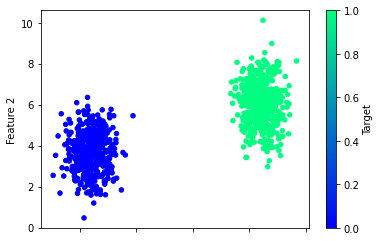

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame (X, columns= ["Feature 1", "Feature 2"])
df["Target"] = y 

# Plotting the dummy data 
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
#Use slklearn to split the dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
#Create a scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler 
X_scaler.fit(X_train)

#Scale the data 
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model 
nn_model = tf.keras.models.Sequential()

In [6]:
#inputdim indicates how many inputs will be in the model 
#units parameter indicates how many neurons we want in the hidden layer
#activation parameter indicates which activation function to use

In [7]:
# add out first Dense layer, including the input layer 
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
#For classification model, we have binary outcome, so need one output neuron
# Add hte output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
#Compile the Sequential model together and customize metrics 
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])     

In [11]:
# train and test basic nn network 
# Fit the model to the training data 
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 947us/step - loss: 0.6941 - accuracy: 0.5775
Epoch 2/100
24/24 [==============================] - 0s 718us/step - loss: 0.6645 - accuracy: 0.5982
Epoch 3/100
24/24 [==============================] - 0s 682us/step - loss: 0.6700 - accuracy: 0.6126
Epoch 4/100
24/24 [==============================] - 0s 624us/step - loss: 0.6531 - accuracy: 0.6436
Epoch 5/100
24/24 [==============================] - 0s 640us/step - loss: 0.6471 - accuracy: 0.6837
Epoch 6/100
24/24 [==============================] - 0s 643us/step - loss: 0.6314 - accuracy: 0.7010
Epoch 7/100
24/24 [==============================] - 0s 650us/step - loss: 0.6132 - accuracy: 0.7203
Epoch 8/100
24/24 [==============================] - 0s 719us/step - loss: 0.6195 - accuracy: 0.7641
Epoch 9/100
24/24 [==============================] - 0s 637us/step - loss: 0.5927 - accuracy: 0.7785
Epoch 10/100
24/24 [==============================] - 0s 719us/step - loss: 0.5662 - accura

Epoch 81/100
24/24 [==============================] - 0s 607us/step - loss: 0.0885 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 772us/step - loss: 0.0869 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0865 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0827 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0811 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0791 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 1.0

<AxesSubplot:>

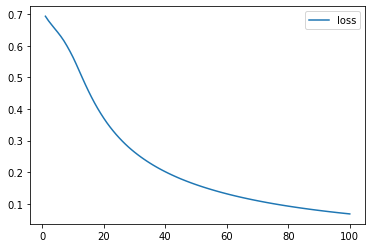

In [12]:
# Create a dataframe containing training history 
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))

#Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

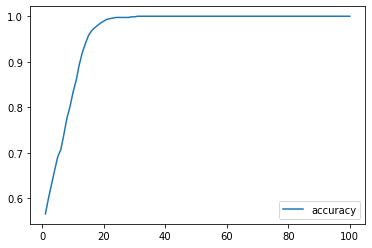

In [13]:
#Plot the accuracy 
history_df.plot(y="accuracy")

In [14]:
#Evaluate the model using the test data 
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose = 2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0706 - accuracy: 1.0000
Loss: 0.07059645652770996, Accuracy: 1.0


In [15]:
# Predict the classification of a new set of blob data 
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

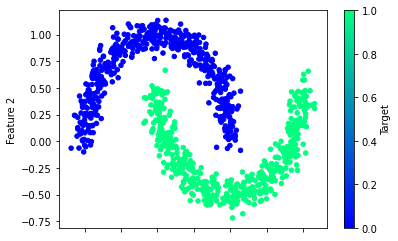

In [16]:
from sklearn.datasets import make_moons

# Create dummy non-linear data 
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector 
y_moons = y_moons.reshape(-1,1)

# Create a dataframe to plot the nonlinear dummy data 
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data 
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")   

In [17]:
from sklearn.model_selection import train_test_split
# Create training and testing sets 
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)

# Create the scaler instance 
X_moon_scaler = skl.preprocessing.StandardScaler()

#Fit the scaler 
X_moon_scaler.fit(X_moon_train)

# Scale the data 
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train) 
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Train the model with the nonlinear data 
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.6907
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.7027
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.7213
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.7307
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7427
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.7547
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.7680
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.7720
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.7813
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.7867
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.2574 - accuracy: 0.8933
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2573 - accuracy: 0.8933
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2573 - accuracy: 0.8933
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.8933
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2570 - accuracy: 0.8933
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2568 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2567 - accuracy: 0.8933
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2567 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2565 - accuracy: 0.8920
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2564 - accuracy: 0.8920
Epoch 93/100


<AxesSubplot:>

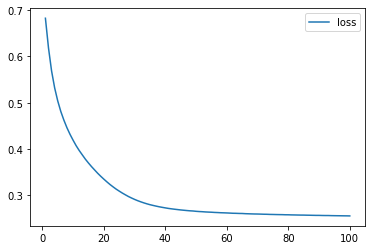

In [19]:
# Create a dataframe containing training history 
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

#Plot the loss 
history_df.plot(y="loss")

<AxesSubplot:>

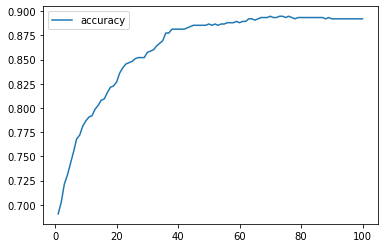

In [20]:
#Plot the loss 
history_df.plot(y="accuracy")

In [21]:
#Generate our new sequential model
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim = number_inputs))

#Add the output layer that uses probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
# Compile the Sequential Model together and customize metrics 
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.8022 - accuracy: 0.3619
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7734 - accuracy: 0.3466
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7278 - accuracy: 0.4382
Epoch 4/100
24/24 [==============================] - 0s 987us/step - loss: 0.6803 - accuracy: 0.5231
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6379 - accuracy: 0.5655
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6212 - accuracy: 0.5922
Epoch 7/100
24/24 [==============================] - 0s 988us/step - loss: 0.5862 - accuracy: 0.6206
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5587 - accuracy: 0.6839
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7412
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.8193
Epoch

24/24 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9213
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.8969
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2347 - accuracy: 0.8863
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9095
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.8880
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1880 - accuracy: 0.9120
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9037
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9191
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.9082
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9133
Epoch 92/100


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

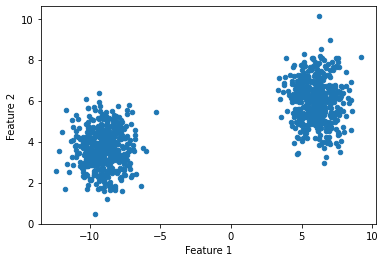

In [31]:
df.plot.scatter(x="Feature 1", y="Feature 2")